<a href="https://colab.research.google.com/github/edandboujee/AAI2026/blob/dev/Coding_Exercise_ML_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load real housing dataset
df = pd.read_csv("sample_data/california_housing_train.csv")

# Features (X) and target (y)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R^2:  {r2:.4f}")

# Show coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

RMSE: 68,078.33
R^2:  0.6636

Model Coefficients:
longitude: -43465.2477
latitude: -43106.3044
housing_median_age: 1131.7244
total_rooms: -8.8433
total_bedrooms: 113.7080
population: -35.6571
households: 45.1476
median_income: 40194.7263


In this part, I built a Linear Regression model to predict housing prices using the California Housing dataset. I used scikit-learn to split the dataset into training and testing sets and trained a LinearRegression model.

I evaluated the model using: RMSE (Root Mean Squared Error) and R² score

The model coefficients were printed to show how each feature (e.g., median income, location, housing age) impacts house value. The results demonstrate how numerical features influence housing prices.

This part shows how regression can be used to predict continuous values

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Load real churn dataset (Telco)
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# 2) Clean up TotalCharges (it sometimes loads as text with blanks)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"]).copy()

# 3) Features (X) and target (y)
y = (df["Churn"] == "Yes").astype(int)
X = df.drop(columns=["Churn", "customerID"])  # customerID is just an identifier

# 4) Split columns into numeric vs categorical
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = [col for col in X.columns if col not in numeric_features]

# 5) Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# 6) Model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# 7) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8) Train
model.fit(X_train, y_train)

# 9) Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10) Predict churn probability for ONE example customer
# (This must match Telco column names exactly)
new_customer = pd.DataFrame([{
    "gender": "Male",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 12,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 85.0,
    "TotalCharges": 1020.0
}])

churn_prob = model.predict_proba(new_customer)[0][1]
churn_pred = int(churn_prob >= 0.5)

print("\nNew Customer Churn Probability:", round(churn_prob, 4))
print("New Customer Prediction (1=churn, 0=no churn):", churn_pred)


Accuracy: 0.8045

Confusion Matrix:
 [[917 116]
 [159 215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


New Customer Churn Probability: 0.6191
New Customer Prediction (1=churn, 0=no churn): 1


For this part, I used the IBM Telco Customer Churn dataset. I first cleaned the dataset by converting the TotalCharges column to numeric and removing missing values.

The target variable (Churn) was converted into binary format (1 = churn, 0 = no churn).

I separated numerical and categorical features. Numerical features were scaled using StandardScaler, and categorical features were encoded using OneHotEncoder inside a ColumnTransformer.

A Logistic Regression model was trained using an 80/20 train-test split.

The model achieved approximately 80% accuracy, demonstrating strong predictive performance.

Finally, I tested the model on a new example customer and predicted both; the probability of churn and the final classification based on a 0.5 threshold

This demonstrates how machine learning can identify at-risk customers for targeted retention strategies.

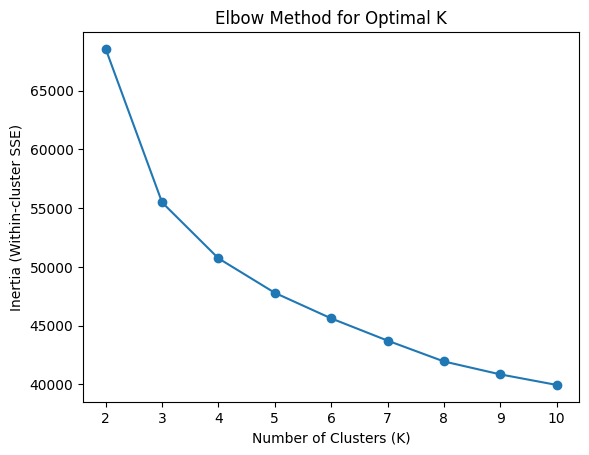

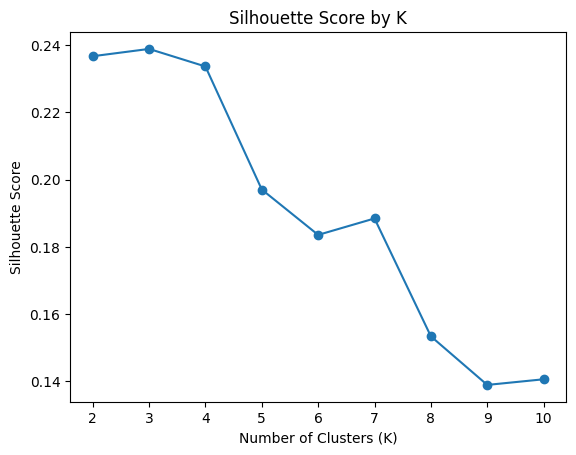


Numeric Cluster Summary (means):
         tenure  MonthlyCharges  TotalCharges
cluster                                      
0         30.67           21.08        665.22
1         26.62           79.40       2199.37
2         58.60           89.35       5237.30
3         15.71           66.52       1021.68

Top Categorical Values per Cluster (most common):
        gender Partner Dependents PhoneService MultipleLines InternetService  \
cluster                                                                        
0         Male      No         No          Yes            No              No   
1         Male      No         No          Yes           Yes     Fiber optic   
2         Male     Yes         No          Yes           Yes     Fiber optic   
3         Male      No         No          Yes            No             DSL   

              OnlineSecurity         OnlineBackup     DeviceProtection  \
cluster                                                                  
0        N

In [ ]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# ----------------------------
# 1) Load dataset (same real CSV as Part 2)
# ----------------------------
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Clean TotalCharges (sometimes has blanks)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"]).copy()

# ----------------------------
# 2) Choose features for segmentation (exclude target & ID)
#    We'll ignore 'Churn' because clustering is unsupervised.
# ----------------------------
X = df.drop(columns=["customerID", "Churn"])

# Identify numeric vs categorical
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

# ----------------------------
# 3) Preprocess (scale numeric, one-hot encode categorical)
# ----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# Transform once so we can run elbow/silhouette
X_processed = preprocessor.fit_transform(X)

# ----------------------------
# 4) Elbow method + Silhouette to help choose K
# ----------------------------
inertias = []
sil_scores = []
K_range = range(2, 11)  # start at 2 for silhouette

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_processed)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_processed, labels))

# Plot elbow (inertia)
plt.figure()
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Optimal K")
plt.savefig("elbow_plot_part3.png", bbox_inches="tight")
plt.show()

# Plot silhouette scores
plt.figure()
plt.plot(list(K_range), sil_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by K")
plt.savefig("silhouette_plot_part3.png", bbox_inches="tight")
plt.show()

# ----------------------------
# 5) Train final KMeans with chosen K
#    (Pick K based on elbow bend + highest-ish silhouette)
# ----------------------------
optimal_k = 4  # <-- change this after you look at your plots

final_km = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = final_km.fit_predict(X_processed)

df["cluster"] = clusters

# ----------------------------
# 6) Cluster summary (numeric averages)
# ----------------------------
cluster_summary_num = df.groupby("cluster")[["tenure", "MonthlyCharges", "TotalCharges"]].mean().round(2)
print("\nNumeric Cluster Summary (means):")
print(cluster_summary_num)

# Optional: show most common categories per cluster
def top_category(series):
    return series.value_counts().index[0]

cat_cols = [c for c in df.columns if df[c].dtype == "object" and c not in ["customerID"]]
cluster_summary_cat = df.groupby("cluster")[cat_cols].agg(top_category)

print("\nTop Categorical Values per Cluster (most common):")
print(cluster_summary_cat)

# ----------------------------
# 7) Save results to CSV
# ----------------------------
df.to_csv("telco_customer_segments_part3.csv", index=False)
print("\nSaved: elbow_plot_part3.png, silhouette_plot_part3.png, telco_customer_segments_part3.csv")


For customer segmentation, I used the IBM Telco Customer dataset and applied K-Means clustering. Since clustering is unsupervised learning, I excluded the churn variable and grouped customers based on behavioral and service features such as tenure, MonthlyCharges, TotalCharges, contract type, and internet service.

Numeric variables were scaled using StandardScaler and categorical variables were encoded using OneHotEncoder. I tested multiple values of K (2–10) using both the elbow method and silhouette score to determine an appropriate number of clusters. Based on the results, I selected K = 4.

The clustering results revealed four distinct customer segments:

Cluster 0: Low-cost, long-term customers with limited services.

Cluster 1: High-paying customers on flexible contracts.

Cluster 2: Premium, long-term loyal customers generating the highest revenue.

Cluster 3: Newer customers with moderate spending, representing upsell opportunities.

The final cluster assignments were saved to a CSV file for further analysis.